# Stock Price Movement Prediction Using The Deutsche Börse Public Dataset & Machine Learning - Notebook 2 (Create Test Dataset)

Here we create a test set of multiple days' data, using the method established in Notebook 1.


## 1. Obtaining Data

We obtain the data for multiple days from the AWS PDS S3 bucket, as per notebook 1, and output a single dataset.


### 'Cooked' dataset 

- Contains the top 100 stocks by trade volume for the days from 2018-01-01 to 2018-03-23 excluding days with no
trades. 
- We have filled in missing trades to have volume 0 and missing prices by forward filling.
- We have added an extra column called `HasTrade` to indicate if the values were filled-in.
- The data is saved in picked format (pkl) and in csv format. The csv format does not preserve the index.
- The picked format preserves the multi-index (by Mnemonic and CalcDataTime). The index values are sorted by Mnemonic and then by CalcDateTime

```
/data/processed/cooked_v3.csv
/data/processed/cooked_v3.pkl
```

We prefer using `/data/processed/cooked_v3.pkl` since it preserves the indices.

In [1]:
import pandas as pd
import os.path

enable_assert = False 

# Edit the start/end date and the output folders
from_date = '2017-07-01'
until_date = '2018-05-15'

# if you enable assert set from_date and until date as below
if enable_assert:
    assert from_date >= '2018-01-01'
    assert until_date <= '2018-03-23'

local_data_folder = '/data/deutsche-boerse-xetra-pds' # do not end in /
output_folder = '/data/processed' # do not end in /

download_script = '/data/deutsche-boerse-xetra-pds/download.sh'

dates = list(pd.date_range(from_date, until_date, freq='D').strftime('%Y-%m-%d'))

! mkdir -p {local_data_folder}

# We found it was more reliable to generate a bash script and run it, rather than
# run the commands in a python for-loop

with open(download_script, 'w') as f:
    f.write("#!/bin/bash\n")
    f.write("\nset -euo pipefail\n")
    f.write("\n# This script was generated to download data for multiple days\n")
    for date in dates:
        success_file =  os.path.join(local_data_folder, date, 'success')

        f.write("""
if [ ! -f {success_file} ]; then

    echo "Getting PDS dataset for date {date}"        
    mkdir -p {local_data_folder}/{date}
    aws s3 sync s3://deutsche-boerse-xetra-pds/{date} {local_data_folder}/{date} --no-sign-request
    touch {success_file}            
else
    echo "PDS dataset for date {date} already exists"
fi\n""".format(success_file=success_file, date=date, local_data_folder=local_data_folder))

        
! chmod +x {download_script}     
! head -n 15 {download_script} 

#!/bin/bash

set -euo pipefail

# This script was generated to download data for multiple days

if [ ! -f /data/deutsche-boerse-xetra-pds/2017-07-01/success ]; then

    echo "Getting PDS dataset for date 2017-07-01"        
    mkdir -p /data/deutsche-boerse-xetra-pds/2017-07-01
    aws s3 sync s3://deutsche-boerse-xetra-pds/2017-07-01 /data/deutsche-boerse-xetra-pds/2017-07-01 --no-sign-request
    touch /data/deutsche-boerse-xetra-pds/2017-07-01/success            
else
    echo "PDS dataset for date 2017-07-01 already exists"
fi


In [2]:
!  {download_script}

Getting PDS dataset for date 2017-07-01
download: s3://deutsche-boerse-xetra-pds/2017-07-01/2017-07-01_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-01/2017-07-01_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-01/2017-07-01_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-01/2017-07-01_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-01/2017-07-01_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-01/2017-07-01_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-01/2017-07-01_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-01/2017-07-01_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-01/2017-07-01_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-01/2017-07-01_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-01/2017-07-01_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-01/2017-07-01_BINS_XETR06.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-07-03/2017-07-03_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-03/2017-07-03_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-03/2017-07-03_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-03/2017-07-03_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-03/2017-07-03_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-03/2017-07-03_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-03/2017-07-03_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-03/2017-07-03_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-03/2017-07-03_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-03/2017-07-03_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-03/2017-07-03_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-03/2017-07-03_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-03/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-07-05/2017-07-05_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-05/2017-07-05_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-05/2017-07-05_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-05/2017-07-05_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-05/2017-07-05_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-05/2017-07-05_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-05/2017-07-05_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-05/2017-07-05_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-05/2017-07-05_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-05/2017-07-05_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-05/2017-07-05_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-05/2017-07-05_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-05/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-07-07/2017-07-07_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-07/2017-07-07_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-07/2017-07-07_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-07/2017-07-07_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-07/2017-07-07_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-07/2017-07-07_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-07/2017-07-07_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-07/2017-07-07_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-07/2017-07-07_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-07/2017-07-07_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-07/2017-07-07_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-07/2017-07-07_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-07/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-07-09/2017-07-09_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-09/2017-07-09_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-09/2017-07-09_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-09/2017-07-09_BINS_XETR20.csv
Getting PDS dataset for date 2017-07-10
download: s3://deutsche-boerse-xetra-pds/2017-07-10/2017-07-10_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-10/2017-07-10_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-10/2017-07-10_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-10/2017-07-10_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-10/2017-07-10_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-10/2017-07-10_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-10/2017-07-10_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-10/2017-07-10_BINS_XETR04.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-07-12/2017-07-12_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-12/2017-07-12_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-12/2017-07-12_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-12/2017-07-12_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-12/2017-07-12_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-12/2017-07-12_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-12/2017-07-12_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-12/2017-07-12_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-12/2017-07-12_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-12/2017-07-12_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-12/2017-07-12_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-12/2017-07-12_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-12/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-07-14/2017-07-14_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-14/2017-07-14_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-14/2017-07-14_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-14/2017-07-14_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-14/2017-07-14_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-14/2017-07-14_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-14/2017-07-14_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-14/2017-07-14_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-14/2017-07-14_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-14/2017-07-14_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-14/2017-07-14_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-14/2017-07-14_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-14/2017-0

Getting PDS dataset for date 2017-07-17
download: s3://deutsche-boerse-xetra-pds/2017-07-17/2017-07-17_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-17/2017-07-17_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-17/2017-07-17_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-17/2017-07-17_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-17/2017-07-17_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-17/2017-07-17_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-17/2017-07-17_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-17/2017-07-17_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-17/2017-07-17_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-17/2017-07-17_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-17/2017-07-17_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-17/2017-07-17_BINS_XETR03.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-07-19/2017-07-19_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-19/2017-07-19_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-19/2017-07-19_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-19/2017-07-19_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-19/2017-07-19_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-19/2017-07-19_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-19/2017-07-19_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-19/2017-07-19_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-19/2017-07-19_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-19/2017-07-19_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-19/2017-07-19_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-19/2017-07-19_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-19/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-07-21/2017-07-21_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-21/2017-07-21_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-21/2017-07-21_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-21/2017-07-21_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-21/2017-07-21_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-21/2017-07-21_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-21/2017-07-21_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-21/2017-07-21_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-21/2017-07-21_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-21/2017-07-21_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-21/2017-07-21_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-21/2017-07-21_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-21/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-07-23/2017-07-23_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-23/2017-07-23_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-23/2017-07-23_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-23/2017-07-23_BINS_XETR21.csv
Getting PDS dataset for date 2017-07-24
download: s3://deutsche-boerse-xetra-pds/2017-07-24/2017-07-24_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-24/2017-07-24_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-24/2017-07-24_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-24/2017-07-24_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-24/2017-07-24_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-24/2017-07-24_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-24/2017-07-24_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-24/2017-07-24_BINS_XETR06.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-07-26/2017-07-26_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-26/2017-07-26_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-26/2017-07-26_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-26/2017-07-26_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-26/2017-07-26_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-26/2017-07-26_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-26/2017-07-26_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-26/2017-07-26_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-26/2017-07-26_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-26/2017-07-26_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-26/2017-07-26_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-26/2017-07-26_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-26/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-07-28/2017-07-28_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-28/2017-07-28_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-28/2017-07-28_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-28/2017-07-28_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-28/2017-07-28_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-28/2017-07-28_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-28/2017-07-28_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-28/2017-07-28_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-28/2017-07-28_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-28/2017-07-28_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-28/2017-07-28_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-28/2017-07-28_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-28/2017-0

Getting PDS dataset for date 2017-07-31
download: s3://deutsche-boerse-xetra-pds/2017-07-31/2017-07-31_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-31/2017-07-31_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-31/2017-07-31_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-31/2017-07-31_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-31/2017-07-31_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-31/2017-07-31_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-31/2017-07-31_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-31/2017-07-31_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-31/2017-07-31_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-31/2017-07-31_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-07-31/2017-07-31_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-07-31/2017-07-31_BINS_XETR03.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-08-02/2017-08-02_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-02/2017-08-02_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-02/2017-08-02_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-02/2017-08-02_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-02/2017-08-02_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-02/2017-08-02_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-02/2017-08-02_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-02/2017-08-02_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-02/2017-08-02_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-02/2017-08-02_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-02/2017-08-02_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-02/2017-08-02_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-02/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-08-04/2017-08-04_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-04/2017-08-04_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-04/2017-08-04_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-04/2017-08-04_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-04/2017-08-04_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-04/2017-08-04_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-04/2017-08-04_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-04/2017-08-04_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-04/2017-08-04_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-04/2017-08-04_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-04/2017-08-04_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-04/2017-08-04_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-04/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-08-06/2017-08-06_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-06/2017-08-06_BINS_XETR22.csv
Getting PDS dataset for date 2017-08-07
download: s3://deutsche-boerse-xetra-pds/2017-08-07/2017-08-07_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-07/2017-08-07_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-07/2017-08-07_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-07/2017-08-07_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-07/2017-08-07_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-07/2017-08-07_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-07/2017-08-07_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-07/2017-08-07_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-07/2017-08-07_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-07/2017-08-07_BINS_XETR06.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-08-09/2017-08-09_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-09/2017-08-09_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-09/2017-08-09_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-09/2017-08-09_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-09/2017-08-09_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-09/2017-08-09_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-09/2017-08-09_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-09/2017-08-09_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-09/2017-08-09_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-09/2017-08-09_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-09/2017-08-09_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-09/2017-08-09_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-09/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-08-11/2017-08-11_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-11/2017-08-11_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-11/2017-08-11_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-11/2017-08-11_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-11/2017-08-11_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-11/2017-08-11_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-11/2017-08-11_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-11/2017-08-11_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-11/2017-08-11_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-11/2017-08-11_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-11/2017-08-11_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-11/2017-08-11_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-11/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-08-13/2017-08-13_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-13/2017-08-13_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-13/2017-08-13_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-13/2017-08-13_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-13/2017-08-13_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-13/2017-08-13_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-13/2017-08-13_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-13/2017-08-13_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-13/2017-08-13_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-13/2017-08-13_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-13/2017-08-13_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-13/2017-08-13_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-13/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-08-15/2017-08-15_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-15/2017-08-15_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-15/2017-08-15_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-15/2017-08-15_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-15/2017-08-15_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-15/2017-08-15_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-15/2017-08-15_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-15/2017-08-15_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-15/2017-08-15_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-15/2017-08-15_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-15/2017-08-15_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-15/2017-08-15_BINS_XETR07.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-15/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-08-17/2017-08-17_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-17/2017-08-17_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-17/2017-08-17_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-17/2017-08-17_BINS_XETR07.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-17/2017-08-17_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-17/2017-08-17_BINS_XETR14.csv
Getting PDS dataset for date 2017-08-18
download: s3://deutsche-boerse-xetra-pds/2017-08-18/2017-08-18_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-18/2017-08-18_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-18/2017-08-18_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-18/2017-08-18_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-18/2017-08-18_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-18/2017-08-18_BINS_XETR02.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-08-20/2017-08-20_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-20/2017-08-20_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-20/2017-08-20_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-20/2017-08-20_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-20/2017-08-20_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-20/2017-08-20_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-20/2017-08-20_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-20/2017-08-20_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-20/2017-08-20_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-20/2017-08-20_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-20/2017-08-20_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-20/2017-08-20_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-20/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-08-22/2017-08-22_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-22/2017-08-22_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-22/2017-08-22_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-22/2017-08-22_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-22/2017-08-22_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-22/2017-08-22_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-22/2017-08-22_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-22/2017-08-22_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-22/2017-08-22_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-22/2017-08-22_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-22/2017-08-22_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-22/2017-08-22_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-22/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-08-24/2017-08-24_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-24/2017-08-24_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-24/2017-08-24_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-24/2017-08-24_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-24/2017-08-24_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-24/2017-08-24_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-24/2017-08-24_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-24/2017-08-24_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-24/2017-08-24_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-24/2017-08-24_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-24/2017-08-24_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-24/2017-08-24_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-24/2017-0

Getting PDS dataset for date 2017-08-27
download: s3://deutsche-boerse-xetra-pds/2017-08-27/2017-08-27_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-27/2017-08-27_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-27/2017-08-27_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-27/2017-08-27_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-27/2017-08-27_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-27/2017-08-27_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-27/2017-08-27_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-27/2017-08-27_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-27/2017-08-27_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-27/2017-08-27_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-27/2017-08-27_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-27/2017-08-27_BINS_XETR06.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-08-29/2017-08-29_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-29/2017-08-29_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-29/2017-08-29_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-29/2017-08-29_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-29/2017-08-29_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-29/2017-08-29_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-29/2017-08-29_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-29/2017-08-29_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-29/2017-08-29_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-29/2017-08-29_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-29/2017-08-29_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-29/2017-08-29_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-29/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-08-31/2017-08-31_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-31/2017-08-31_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-31/2017-08-31_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-31/2017-08-31_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-31/2017-08-31_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-31/2017-08-31_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-31/2017-08-31_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-31/2017-08-31_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-31/2017-08-31_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-31/2017-08-31_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-31/2017-08-31_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2017-08-31/2017-08-31_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2017-08-31/2017-0

Getting PDS dataset for date 2017-09-03
download: s3://deutsche-boerse-xetra-pds/2017-09-03/2017-09-03_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-03/2017-09-03_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-03/2017-09-03_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-03/2017-09-03_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-03/2017-09-03_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-03/2017-09-03_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-03/2017-09-03_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-03/2017-09-03_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-03/2017-09-03_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-03/2017-09-03_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-03/2017-09-03_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-03/2017-09-03_BINS_XETR08.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-09-05/2017-09-05_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-05/2017-09-05_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-05/2017-09-05_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-05/2017-09-05_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-05/2017-09-05_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-05/2017-09-05_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-05/2017-09-05_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-05/2017-09-05_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-05/2017-09-05_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-05/2017-09-05_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-05/2017-09-05_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-05/2017-09-05_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-05/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-09-07/2017-09-07_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-07/2017-09-07_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-07/2017-09-07_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-07/2017-09-07_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-07/2017-09-07_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-07/2017-09-07_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-07/2017-09-07_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-07/2017-09-07_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-07/2017-09-07_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-07/2017-09-07_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-07/2017-09-07_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-07/2017-09-07_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-07/2017-0

Getting PDS dataset for date 2017-09-10
download: s3://deutsche-boerse-xetra-pds/2017-09-10/2017-09-10_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-10/2017-09-10_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-10/2017-09-10_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-10/2017-09-10_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-10/2017-09-10_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-10/2017-09-10_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-10/2017-09-10_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-10/2017-09-10_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-10/2017-09-10_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-10/2017-09-10_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-10/2017-09-10_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-10/2017-09-10_BINS_XETR06.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-09-12/2017-09-12_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-12/2017-09-12_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-12/2017-09-12_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-12/2017-09-12_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-12/2017-09-12_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-12/2017-09-12_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-12/2017-09-12_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-12/2017-09-12_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-12/2017-09-12_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-12/2017-09-12_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-12/2017-09-12_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-12/2017-09-12_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-12/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-09-14/2017-09-14_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-14/2017-09-14_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-14/2017-09-14_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-14/2017-09-14_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-14/2017-09-14_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-14/2017-09-14_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-14/2017-09-14_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-14/2017-09-14_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-14/2017-09-14_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-14/2017-09-14_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-14/2017-09-14_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-14/2017-09-14_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-14/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-09-16/2017-09-16_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-16/2017-09-16_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-16/2017-09-16_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-16/2017-09-16_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-16/2017-09-16_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-16/2017-09-16_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-16/2017-09-16_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-16/2017-09-16_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-16/2017-09-16_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-16/2017-09-16_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-16/2017-09-16_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-16/2017-09-16_BINS_XETR11.csv
Getting PDS dataset for date 2017-09-17
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-09-18/2017-09-18_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-18/2017-09-18_BINS_XETR14.csv
Getting PDS dataset for date 2017-09-19
download: s3://deutsche-boerse-xetra-pds/2017-09-19/2017-09-19_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-19/2017-09-19_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-19/2017-09-19_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-19/2017-09-19_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-19/2017-09-19_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-19/2017-09-19_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-19/2017-09-19_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-19/2017-09-19_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-19/2017-09-19_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-19/2017-09-19_BINS_XETR06.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-09-21/2017-09-21_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-21/2017-09-21_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-21/2017-09-21_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-21/2017-09-21_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-21/2017-09-21_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-21/2017-09-21_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-21/2017-09-21_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-21/2017-09-21_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-21/2017-09-21_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-21/2017-09-21_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-21/2017-09-21_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-21/2017-09-21_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-21/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-09-23/2017-09-23_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-23/2017-09-23_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-23/2017-09-23_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-23/2017-09-23_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-23/2017-09-23_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-23/2017-09-23_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-23/2017-09-23_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-23/2017-09-23_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-23/2017-09-23_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-23/2017-09-23_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-23/2017-09-23_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-23/2017-09-23_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-23/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-09-25/2017-09-25_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-25/2017-09-25_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-25/2017-09-25_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-25/2017-09-25_BINS_XETR15.csv
Getting PDS dataset for date 2017-09-26
download: s3://deutsche-boerse-xetra-pds/2017-09-26/2017-09-26_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-26/2017-09-26_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-26/2017-09-26_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-26/2017-09-26_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-26/2017-09-26_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-26/2017-09-26_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-26/2017-09-26_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-26/2017-09-26_BINS_XETR02.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-09-28/2017-09-28_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-28/2017-09-28_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-28/2017-09-28_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-28/2017-09-28_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-28/2017-09-28_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-28/2017-09-28_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-28/2017-09-28_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-28/2017-09-28_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-28/2017-09-28_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-28/2017-09-28_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-28/2017-09-28_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-28/2017-09-28_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-28/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-09-30/2017-09-30_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-30/2017-09-30_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-30/2017-09-30_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-30/2017-09-30_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-30/2017-09-30_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-30/2017-09-30_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-30/2017-09-30_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-30/2017-09-30_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-30/2017-09-30_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-30/2017-09-30_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-30/2017-09-30_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2017-09-30/2017-09-30_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2017-09-30/2017-0

download: s3://deutsche-boerse-xetra-pds/2017-10-02/2017-10-02_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-02/2017-10-02_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-02/2017-10-02_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-02/2017-10-02_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-02/2017-10-02_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-02/2017-10-02_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-02/2017-10-02_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-02/2017-10-02_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-02/2017-10-02_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-02/2017-10-02_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-02/2017-10-02_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-02/2017-10-02_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-02/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-10-04/2017-10-04_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-04/2017-10-04_BINS_XETR07.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-04/2017-10-04_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-04/2017-10-04_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-04/2017-10-04_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-04/2017-10-04_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-04/2017-10-04_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-04/2017-10-04_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-04/2017-10-04_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-04/2017-10-04_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-04/2017-10-04_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-04/2017-10-04_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-04/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-10-06/2017-10-06_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-06/2017-10-06_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-06/2017-10-06_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-06/2017-10-06_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-06/2017-10-06_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-06/2017-10-06_BINS_XETR08.csv
Getting PDS dataset for date 2017-10-07
download: s3://deutsche-boerse-xetra-pds/2017-10-07/2017-10-07_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-07/2017-10-07_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-07/2017-10-07_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-07/2017-10-07_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-07/2017-10-07_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-07/2017-10-07_BINS_XETR03.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-10-09/2017-10-09_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-09/2017-10-09_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-09/2017-10-09_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-09/2017-10-09_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-09/2017-10-09_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-09/2017-10-09_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-09/2017-10-09_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-09/2017-10-09_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-09/2017-10-09_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-09/2017-10-09_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-09/2017-10-09_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-09/2017-10-09_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-09/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-10-11/2017-10-11_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-11/2017-10-11_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-11/2017-10-11_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-11/2017-10-11_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-11/2017-10-11_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-11/2017-10-11_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-11/2017-10-11_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-11/2017-10-11_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-11/2017-10-11_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-11/2017-10-11_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-11/2017-10-11_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-11/2017-10-11_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-11/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-10-13/2017-10-13_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-13/2017-10-13_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-13/2017-10-13_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-13/2017-10-13_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-13/2017-10-13_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-13/2017-10-13_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-13/2017-10-13_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-13/2017-10-13_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-13/2017-10-13_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-13/2017-10-13_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-13/2017-10-13_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-13/2017-10-13_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-13/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-10-15/2017-10-15_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-15/2017-10-15_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-15/2017-10-15_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-15/2017-10-15_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-15/2017-10-15_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-15/2017-10-15_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-15/2017-10-15_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-15/2017-10-15_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-15/2017-10-15_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-15/2017-10-15_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-15/2017-10-15_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-15/2017-10-15_BINS_XETR18.csv
Getting PDS dataset for date 2017-10-16
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-10-17/2017-10-17_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-17/2017-10-17_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-17/2017-10-17_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-17/2017-10-17_BINS_XETR14.csv
Getting PDS dataset for date 2017-10-18
download: s3://deutsche-boerse-xetra-pds/2017-10-18/2017-10-18_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-18/2017-10-18_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-18/2017-10-18_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-18/2017-10-18_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-18/2017-10-18_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-18/2017-10-18_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-18/2017-10-18_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-18/2017-10-18_BINS_XETR05.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-10-20/2017-10-20_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-20/2017-10-20_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-20/2017-10-20_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-20/2017-10-20_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-20/2017-10-20_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-20/2017-10-20_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-20/2017-10-20_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-20/2017-10-20_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-20/2017-10-20_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-20/2017-10-20_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-20/2017-10-20_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-20/2017-10-20_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-20/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-10-22/2017-10-22_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-22/2017-10-22_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-22/2017-10-22_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-22/2017-10-22_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-22/2017-10-22_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-22/2017-10-22_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-22/2017-10-22_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-22/2017-10-22_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-22/2017-10-22_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-22/2017-10-22_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-22/2017-10-22_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-22/2017-10-22_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-22/2017-1

Getting PDS dataset for date 2017-10-25
download: s3://deutsche-boerse-xetra-pds/2017-10-25/2017-10-25_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-25/2017-10-25_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-25/2017-10-25_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-25/2017-10-25_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-25/2017-10-25_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-25/2017-10-25_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-25/2017-10-25_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-25/2017-10-25_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-25/2017-10-25_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-25/2017-10-25_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-25/2017-10-25_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-25/2017-10-25_BINS_XETR06.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-10-27/2017-10-27_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-27/2017-10-27_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-27/2017-10-27_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-27/2017-10-27_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-27/2017-10-27_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-27/2017-10-27_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-27/2017-10-27_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-27/2017-10-27_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-27/2017-10-27_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-27/2017-10-27_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-27/2017-10-27_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-27/2017-10-27_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-27/2017-1

Getting PDS dataset for date 2017-10-30
download: s3://deutsche-boerse-xetra-pds/2017-10-30/2017-10-30_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-30/2017-10-30_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-30/2017-10-30_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-30/2017-10-30_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-30/2017-10-30_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-30/2017-10-30_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-30/2017-10-30_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-30/2017-10-30_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-30/2017-10-30_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-30/2017-10-30_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2017-10-30/2017-10-30_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-10-30/2017-10-30_BINS_XETR06.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-11-01/2017-11-01_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-01/2017-11-01_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-01/2017-11-01_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-01/2017-11-01_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-01/2017-11-01_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-01/2017-11-01_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-01/2017-11-01_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-01/2017-11-01_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-01/2017-11-01_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-01/2017-11-01_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-01/2017-11-01_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-01/2017-11-01_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-01/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-11-03/2017-11-03_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-03/2017-11-03_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-03/2017-11-03_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-03/2017-11-03_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-03/2017-11-03_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-03/2017-11-03_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-03/2017-11-03_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-03/2017-11-03_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-03/2017-11-03_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-03/2017-11-03_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-03/2017-11-03_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-03/2017-11-03_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-03/2017-1

Getting PDS dataset for date 2017-11-06
download: s3://deutsche-boerse-xetra-pds/2017-11-06/2017-11-06_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-06/2017-11-06_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-06/2017-11-06_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-06/2017-11-06_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-06/2017-11-06_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-06/2017-11-06_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-06/2017-11-06_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-06/2017-11-06_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-06/2017-11-06_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-06/2017-11-06_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-06/2017-11-06_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-06/2017-11-06_BINS_XETR06.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-11-08/2017-11-08_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-08/2017-11-08_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-08/2017-11-08_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-08/2017-11-08_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-08/2017-11-08_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-08/2017-11-08_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-08/2017-11-08_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-08/2017-11-08_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-08/2017-11-08_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-08/2017-11-08_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-08/2017-11-08_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-08/2017-11-08_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-08/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-11-10/2017-11-10_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-10/2017-11-10_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-10/2017-11-10_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-10/2017-11-10_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-10/2017-11-10_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-10/2017-11-10_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-10/2017-11-10_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-10/2017-11-10_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-10/2017-11-10_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-10/2017-11-10_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-10/2017-11-10_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-10/2017-11-10_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-10/2017-1

Getting PDS dataset for date 2017-11-13
download: s3://deutsche-boerse-xetra-pds/2017-11-13/2017-11-13_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-13/2017-11-13_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-13/2017-11-13_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-13/2017-11-13_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-13/2017-11-13_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-13/2017-11-13_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-13/2017-11-13_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-13/2017-11-13_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-13/2017-11-13_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-13/2017-11-13_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-13/2017-11-13_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-13/2017-11-13_BINS_XETR07.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-11-15/2017-11-15_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-15/2017-11-15_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-15/2017-11-15_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-15/2017-11-15_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-15/2017-11-15_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-15/2017-11-15_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-15/2017-11-15_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-15/2017-11-15_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-15/2017-11-15_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-15/2017-11-15_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-15/2017-11-15_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-15/2017-11-15_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-15/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-11-17/2017-11-17_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-17/2017-11-17_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-17/2017-11-17_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-17/2017-11-17_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-17/2017-11-17_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-17/2017-11-17_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-17/2017-11-17_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-17/2017-11-17_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-17/2017-11-17_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-17/2017-11-17_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-17/2017-11-17_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-17/2017-11-17_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-17/2017-1

Getting PDS dataset for date 2017-11-20
download: s3://deutsche-boerse-xetra-pds/2017-11-20/2017-11-20_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-20/2017-11-20_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-20/2017-11-20_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-20/2017-11-20_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-20/2017-11-20_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-20/2017-11-20_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-20/2017-11-20_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-20/2017-11-20_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-20/2017-11-20_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-20/2017-11-20_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-20/2017-11-20_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-20/2017-11-20_BINS_XETR05.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-11-22/2017-11-22_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-22/2017-11-22_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-22/2017-11-22_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-22/2017-11-22_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-22/2017-11-22_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-22/2017-11-22_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-22/2017-11-22_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-22/2017-11-22_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-22/2017-11-22_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-22/2017-11-22_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-22/2017-11-22_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-22/2017-11-22_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-22/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-11-24/2017-11-24_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-24/2017-11-24_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-24/2017-11-24_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-24/2017-11-24_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-24/2017-11-24_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-24/2017-11-24_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-24/2017-11-24_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-24/2017-11-24_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-24/2017-11-24_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-24/2017-11-24_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-24/2017-11-24_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-24/2017-11-24_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-24/2017-1

Getting PDS dataset for date 2017-11-27
download: s3://deutsche-boerse-xetra-pds/2017-11-27/2017-11-27_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-27/2017-11-27_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-27/2017-11-27_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-27/2017-11-27_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-27/2017-11-27_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-27/2017-11-27_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-27/2017-11-27_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-27/2017-11-27_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-27/2017-11-27_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-27/2017-11-27_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-27/2017-11-27_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-27/2017-11-27_BINS_XETR06.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-11-29/2017-11-29_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-29/2017-11-29_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-29/2017-11-29_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-29/2017-11-29_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-29/2017-11-29_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-29/2017-11-29_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-29/2017-11-29_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-29/2017-11-29_BINS_XETR07.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-29/2017-11-29_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-29/2017-11-29_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-29/2017-11-29_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-11-29/2017-11-29_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-11-29/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-12-01/2017-12-01_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-01/2017-12-01_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-01/2017-12-01_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-01/2017-12-01_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-01/2017-12-01_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-01/2017-12-01_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-01/2017-12-01_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-01/2017-12-01_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-01/2017-12-01_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-01/2017-12-01_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-01/2017-12-01_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-01/2017-12-01_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-01/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-12-03/2017-12-03_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-03/2017-12-03_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-03/2017-12-03_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-03/2017-12-03_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-03/2017-12-03_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-03/2017-12-03_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-03/2017-12-03_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-03/2017-12-03_BINS_XETR22.csv
Getting PDS dataset for date 2017-12-04
download: s3://deutsche-boerse-xetra-pds/2017-12-04/2017-12-04_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-04/2017-12-04_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-04/2017-12-04_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-04/2017-12-04_BINS_XETR01.csv
download: s3://deu

Getting PDS dataset for date 2017-12-06
download: s3://deutsche-boerse-xetra-pds/2017-12-06/2017-12-06_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-06/2017-12-06_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-06/2017-12-06_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-06/2017-12-06_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-06/2017-12-06_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-06/2017-12-06_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-06/2017-12-06_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-06/2017-12-06_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-06/2017-12-06_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-06/2017-12-06_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-06/2017-12-06_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-06/2017-12-06_BINS_XETR07.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-12-08/2017-12-08_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-08/2017-12-08_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-08/2017-12-08_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-08/2017-12-08_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-08/2017-12-08_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-08/2017-12-08_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-08/2017-12-08_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-08/2017-12-08_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-08/2017-12-08_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-08/2017-12-08_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-08/2017-12-08_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-08/2017-12-08_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-08/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-12-10/2017-12-10_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-10/2017-12-10_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-10/2017-12-10_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-10/2017-12-10_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-10/2017-12-10_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-10/2017-12-10_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-10/2017-12-10_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-10/2017-12-10_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-10/2017-12-10_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-10/2017-12-10_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-10/2017-12-10_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-10/2017-12-10_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-10/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-12-12/2017-12-12_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-12/2017-12-12_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-12/2017-12-12_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-12/2017-12-12_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-12/2017-12-12_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-12/2017-12-12_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-12/2017-12-12_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-12/2017-12-12_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-12/2017-12-12_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-12/2017-12-12_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-12/2017-12-12_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-12/2017-12-12_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-12/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-12-14/2017-12-14_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-14/2017-12-14_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-14/2017-12-14_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-14/2017-12-14_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-14/2017-12-14_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-14/2017-12-14_BINS_XETR16.csv
Getting PDS dataset for date 2017-12-15
download: s3://deutsche-boerse-xetra-pds/2017-12-15/2017-12-15_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-15/2017-12-15_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-15/2017-12-15_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-15/2017-12-15_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-15/2017-12-15_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-15/2017-12-15_BINS_XETR02.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-12-17/2017-12-17_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-17/2017-12-17_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-17/2017-12-17_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-17/2017-12-17_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-17/2017-12-17_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-17/2017-12-17_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-17/2017-12-17_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-17/2017-12-17_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-17/2017-12-17_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-17/2017-12-17_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-17/2017-12-17_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-17/2017-12-17_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-17/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-12-19/2017-12-19_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-19/2017-12-19_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-19/2017-12-19_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-19/2017-12-19_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-19/2017-12-19_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-19/2017-12-19_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-19/2017-12-19_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-19/2017-12-19_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-19/2017-12-19_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-19/2017-12-19_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-19/2017-12-19_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-19/2017-12-19_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-19/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-12-21/2017-12-21_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-21/2017-12-21_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-21/2017-12-21_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-21/2017-12-21_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-21/2017-12-21_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-21/2017-12-21_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-21/2017-12-21_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-21/2017-12-21_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-21/2017-12-21_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-21/2017-12-21_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-21/2017-12-21_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-21/2017-12-21_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-21/2017-1

Getting PDS dataset for date 2017-12-24
download: s3://deutsche-boerse-xetra-pds/2017-12-24/2017-12-24_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-24/2017-12-24_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-24/2017-12-24_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-24/2017-12-24_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-24/2017-12-24_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-24/2017-12-24_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-24/2017-12-24_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-24/2017-12-24_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-24/2017-12-24_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-24/2017-12-24_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-24/2017-12-24_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-24/2017-12-24_BINS_XETR08.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2017-12-26/2017-12-26_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-26/2017-12-26_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-26/2017-12-26_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-26/2017-12-26_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-26/2017-12-26_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-26/2017-12-26_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-26/2017-12-26_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-26/2017-12-26_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-26/2017-12-26_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-26/2017-12-26_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-26/2017-12-26_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-26/2017-12-26_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-26/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-12-28/2017-12-28_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-28/2017-12-28_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-28/2017-12-28_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-28/2017-12-28_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-28/2017-12-28_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-28/2017-12-28_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-28/2017-12-28_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-28/2017-12-28_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-28/2017-12-28_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-28/2017-12-28_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-28/2017-12-28_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-28/2017-12-28_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-28/2017-1

download: s3://deutsche-boerse-xetra-pds/2017-12-30/2017-12-30_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-30/2017-12-30_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-30/2017-12-30_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-30/2017-12-30_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-30/2017-12-30_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-30/2017-12-30_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-30/2017-12-30_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-30/2017-12-30_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-30/2017-12-30_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-30/2017-12-30_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2017-12-30/2017-12-30_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2017-12-30/2017-12-30_BINS_XETR23.csv
Getting PDS dataset for date 2017-12-31
download: s3://deu

Getting PDS dataset for date 2018-01-02
download: s3://deutsche-boerse-xetra-pds/2018-01-02/2018-01-02_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-02/2018-01-02_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-02/2018-01-02_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-02/2018-01-02_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-02/2018-01-02_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-02/2018-01-02_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-02/2018-01-02_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-02/2018-01-02_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-02/2018-01-02_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-02/2018-01-02_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-02/2018-01-02_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-02/2018-01-02_BINS_XETR04.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2018-01-04/2018-01-04_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-04/2018-01-04_BINS_XETR07.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-04/2018-01-04_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-04/2018-01-04_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-04/2018-01-04_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-04/2018-01-04_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-04/2018-01-04_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-04/2018-01-04_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-04/2018-01-04_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-04/2018-01-04_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-04/2018-01-04_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-04/2018-01-04_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-04/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-01-06/2018-01-06_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-06/2018-01-06_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-06/2018-01-06_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-06/2018-01-06_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-06/2018-01-06_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-06/2018-01-06_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-06/2018-01-06_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-06/2018-01-06_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-06/2018-01-06_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-06/2018-01-06_BINS_XETR07.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-06/2018-01-06_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-06/2018-01-06_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-06/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-01-08/2018-01-08_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-08/2018-01-08_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-08/2018-01-08_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-08/2018-01-08_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-08/2018-01-08_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-08/2018-01-08_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-08/2018-01-08_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-08/2018-01-08_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-08/2018-01-08_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-08/2018-01-08_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-08/2018-01-08_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-08/2018-01-08_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-08/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-01-10/2018-01-10_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-10/2018-01-10_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-10/2018-01-10_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-10/2018-01-10_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-10/2018-01-10_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-10/2018-01-10_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-10/2018-01-10_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-10/2018-01-10_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-10/2018-01-10_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-10/2018-01-10_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-10/2018-01-10_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-10/2018-01-10_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-10/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-01-12/2018-01-12_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-12/2018-01-12_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-12/2018-01-12_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-12/2018-01-12_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-12/2018-01-12_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-12/2018-01-12_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-12/2018-01-12_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-12/2018-01-12_BINS_XETR14.csv
Getting PDS dataset for date 2018-01-13
download: s3://deutsche-boerse-xetra-pds/2018-01-13/2018-01-13_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-13/2018-01-13_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-13/2018-01-13_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-13/2018-01-13_BINS_XETR00.csv
download: s3://deu

Getting PDS dataset for date 2018-01-15
download: s3://deutsche-boerse-xetra-pds/2018-01-15/2018-01-15_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-15/2018-01-15_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-15/2018-01-15_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-15/2018-01-15_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-15/2018-01-15_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-15/2018-01-15_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-15/2018-01-15_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-15/2018-01-15_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-15/2018-01-15_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-15/2018-01-15_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-15/2018-01-15_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-15/2018-01-15_BINS_XETR05.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2018-01-17/2018-01-17_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-17/2018-01-17_BINS_XETR07.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-17/2018-01-17_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-17/2018-01-17_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-17/2018-01-17_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-17/2018-01-17_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-17/2018-01-17_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-17/2018-01-17_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-17/2018-01-17_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-17/2018-01-17_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-17/2018-01-17_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-17/2018-01-17_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-17/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-01-19/2018-01-19_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-19/2018-01-19_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-19/2018-01-19_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-19/2018-01-19_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-19/2018-01-19_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-19/2018-01-19_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-19/2018-01-19_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-19/2018-01-19_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-19/2018-01-19_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-19/2018-01-19_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-19/2018-01-19_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-19/2018-01-19_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-19/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-01-21/2018-01-21_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-21/2018-01-21_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-21/2018-01-21_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-21/2018-01-21_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-21/2018-01-21_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-21/2018-01-21_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-21/2018-01-21_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-21/2018-01-21_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-21/2018-01-21_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-21/2018-01-21_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-21/2018-01-21_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-21/2018-01-21_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-21/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-01-23/2018-01-23_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-23/2018-01-23_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-23/2018-01-23_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-23/2018-01-23_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-23/2018-01-23_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-23/2018-01-23_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-23/2018-01-23_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-23/2018-01-23_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-23/2018-01-23_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-23/2018-01-23_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-23/2018-01-23_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-23/2018-01-23_BINS_XETR14.csv
Getting PDS dataset for date 2018-01-24
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2018-01-25/2018-01-25_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-25/2018-01-25_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-25/2018-01-25_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-25/2018-01-25_BINS_XETR15.csv
Getting PDS dataset for date 2018-01-26
download: s3://deutsche-boerse-xetra-pds/2018-01-26/2018-01-26_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-26/2018-01-26_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-26/2018-01-26_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-26/2018-01-26_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-26/2018-01-26_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-26/2018-01-26_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-26/2018-01-26_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-26/2018-01-26_BINS_XETR02.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2018-01-28/2018-01-28_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-28/2018-01-28_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-28/2018-01-28_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-28/2018-01-28_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-28/2018-01-28_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-28/2018-01-28_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-28/2018-01-28_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-28/2018-01-28_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-28/2018-01-28_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-28/2018-01-28_BINS_XETR07.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-28/2018-01-28_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-28/2018-01-28_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-28/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-01-30/2018-01-30_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-30/2018-01-30_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-30/2018-01-30_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-30/2018-01-30_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-30/2018-01-30_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-30/2018-01-30_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-30/2018-01-30_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-30/2018-01-30_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-30/2018-01-30_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-30/2018-01-30_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-30/2018-01-30_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2018-01-30/2018-01-30_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2018-01-30/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-02-01/2018-02-01_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-01/2018-02-01_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-01/2018-02-01_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-01/2018-02-01_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-01/2018-02-01_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-01/2018-02-01_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-01/2018-02-01_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-01/2018-02-01_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-01/2018-02-01_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-01/2018-02-01_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-01/2018-02-01_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-01/2018-02-01_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-01/2018-0

Getting PDS dataset for date 2018-02-04
download: s3://deutsche-boerse-xetra-pds/2018-02-04/2018-02-04_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-04/2018-02-04_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-04/2018-02-04_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-04/2018-02-04_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-04/2018-02-04_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-04/2018-02-04_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-04/2018-02-04_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-04/2018-02-04_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-04/2018-02-04_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-04/2018-02-04_BINS_XETR07.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-04/2018-02-04_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-04/2018-02-04_BINS_XETR05.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2018-02-06/2018-02-06_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-06/2018-02-06_BINS_XETR07.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-06/2018-02-06_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-06/2018-02-06_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-06/2018-02-06_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-06/2018-02-06_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-06/2018-02-06_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-06/2018-02-06_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-06/2018-02-06_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-06/2018-02-06_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-06/2018-02-06_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-06/2018-02-06_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-06/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-02-08/2018-02-08_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-08/2018-02-08_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-08/2018-02-08_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-08/2018-02-08_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-08/2018-02-08_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-08/2018-02-08_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-08/2018-02-08_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-08/2018-02-08_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-08/2018-02-08_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-08/2018-02-08_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-08/2018-02-08_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-08/2018-02-08_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-08/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-02-10/2018-02-10_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-10/2018-02-10_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-10/2018-02-10_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-10/2018-02-10_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-10/2018-02-10_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-10/2018-02-10_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-10/2018-02-10_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-10/2018-02-10_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-10/2018-02-10_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-10/2018-02-10_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-10/2018-02-10_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-10/2018-02-10_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-10/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-02-12/2018-02-12_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-12/2018-02-12_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-12/2018-02-12_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-12/2018-02-12_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-12/2018-02-12_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-12/2018-02-12_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-12/2018-02-12_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-12/2018-02-12_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-12/2018-02-12_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-12/2018-02-12_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-12/2018-02-12_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-12/2018-02-12_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-12/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-02-14/2018-02-14_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-14/2018-02-14_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-14/2018-02-14_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-14/2018-02-14_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-14/2018-02-14_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-14/2018-02-14_BINS_XETR14.csv
Getting PDS dataset for date 2018-02-15
download: s3://deutsche-boerse-xetra-pds/2018-02-15/2018-02-15_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-15/2018-02-15_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-15/2018-02-15_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-15/2018-02-15_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-15/2018-02-15_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-15/2018-02-15_BINS_XETR02.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2018-02-17/2018-02-17_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-17/2018-02-17_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-17/2018-02-17_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-17/2018-02-17_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-17/2018-02-17_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-17/2018-02-17_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-17/2018-02-17_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-17/2018-02-17_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-17/2018-02-17_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-17/2018-02-17_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-17/2018-02-17_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-17/2018-02-17_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-17/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-02-19/2018-02-19_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-19/2018-02-19_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-19/2018-02-19_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-19/2018-02-19_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-19/2018-02-19_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-19/2018-02-19_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-19/2018-02-19_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-19/2018-02-19_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-19/2018-02-19_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-19/2018-02-19_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-19/2018-02-19_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-19/2018-02-19_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-19/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-02-21/2018-02-21_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-21/2018-02-21_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-21/2018-02-21_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-21/2018-02-21_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-21/2018-02-21_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-21/2018-02-21_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-21/2018-02-21_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-21/2018-02-21_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-21/2018-02-21_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-21/2018-02-21_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-21/2018-02-21_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-21/2018-02-21_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-21/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-02-23/2018-02-23_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-23/2018-02-23_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-23/2018-02-23_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-23/2018-02-23_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-23/2018-02-23_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-23/2018-02-23_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-23/2018-02-23_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-23/2018-02-23_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-23/2018-02-23_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-23/2018-02-23_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-23/2018-02-23_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-23/2018-02-23_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-23/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-02-25/2018-02-25_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-25/2018-02-25_BINS_XETR23.csv
Getting PDS dataset for date 2018-02-26
download: s3://deutsche-boerse-xetra-pds/2018-02-26/2018-02-26_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-26/2018-02-26_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-26/2018-02-26_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-26/2018-02-26_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-26/2018-02-26_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-26/2018-02-26_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-26/2018-02-26_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-26/2018-02-26_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-26/2018-02-26_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-26/2018-02-26_BINS_XETR04.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2018-02-28/2018-02-28_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-28/2018-02-28_BINS_XETR07.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-28/2018-02-28_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-28/2018-02-28_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-28/2018-02-28_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-28/2018-02-28_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-28/2018-02-28_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-28/2018-02-28_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-28/2018-02-28_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-28/2018-02-28_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-28/2018-02-28_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2018-02-28/2018-02-28_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2018-02-28/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-03-02/2018-03-02_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-02/2018-03-02_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-02/2018-03-02_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-02/2018-03-02_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-02/2018-03-02_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-02/2018-03-02_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-02/2018-03-02_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-02/2018-03-02_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-02/2018-03-02_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-02/2018-03-02_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-02/2018-03-02_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-02/2018-03-02_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-02/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-03-04/2018-03-04_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-04/2018-03-04_BINS_XETR20.csv
Getting PDS dataset for date 2018-03-05
download: s3://deutsche-boerse-xetra-pds/2018-03-05/2018-03-05_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-05/2018-03-05_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-05/2018-03-05_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-05/2018-03-05_BINS_XETR07.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-05/2018-03-05_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-05/2018-03-05_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-05/2018-03-05_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-05/2018-03-05_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-05/2018-03-05_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-05/2018-03-05_BINS_XETR03.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2018-03-07/2018-03-07_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-07/2018-03-07_BINS_XETR07.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-07/2018-03-07_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-07/2018-03-07_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-07/2018-03-07_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-07/2018-03-07_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-07/2018-03-07_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-07/2018-03-07_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-07/2018-03-07_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-07/2018-03-07_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-07/2018-03-07_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-07/2018-03-07_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-07/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-03-09/2018-03-09_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-09/2018-03-09_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-09/2018-03-09_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-09/2018-03-09_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-09/2018-03-09_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-09/2018-03-09_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-09/2018-03-09_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-09/2018-03-09_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-09/2018-03-09_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-09/2018-03-09_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-09/2018-03-09_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-09/2018-03-09_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-09/2018-0

Getting PDS dataset for date 2018-03-12
download: s3://deutsche-boerse-xetra-pds/2018-03-12/2018-03-12_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-12/2018-03-12_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-12/2018-03-12_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-12/2018-03-12_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-12/2018-03-12_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-12/2018-03-12_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-12/2018-03-12_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-12/2018-03-12_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-12/2018-03-12_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-12/2018-03-12_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-12/2018-03-12_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-12/2018-03-12_BINS_XETR04.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2018-03-14/2018-03-14_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-14/2018-03-14_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-14/2018-03-14_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-14/2018-03-14_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-14/2018-03-14_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-14/2018-03-14_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-14/2018-03-14_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-14/2018-03-14_BINS_XETR07.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-14/2018-03-14_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-14/2018-03-14_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-14/2018-03-14_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-14/2018-03-14_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-14/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-03-16/2018-03-16_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-16/2018-03-16_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-16/2018-03-16_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-16/2018-03-16_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-16/2018-03-16_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-16/2018-03-16_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-16/2018-03-16_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-16/2018-03-16_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-16/2018-03-16_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-16/2018-03-16_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-16/2018-03-16_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-16/2018-03-16_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-16/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-03-18/2018-03-18_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-18/2018-03-18_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-18/2018-03-18_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-18/2018-03-18_BINS_XETR17.csv
Getting PDS dataset for date 2018-03-19
download: s3://deutsche-boerse-xetra-pds/2018-03-19/2018-03-19_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-19/2018-03-19_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-19/2018-03-19_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-19/2018-03-19_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-19/2018-03-19_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-19/2018-03-19_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-19/2018-03-19_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-19/2018-03-19_BINS_XETR02.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2018-03-21/2018-03-21_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-21/2018-03-21_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-21/2018-03-21_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-21/2018-03-21_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-21/2018-03-21_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-21/2018-03-21_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-21/2018-03-21_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-21/2018-03-21_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-21/2018-03-21_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-21/2018-03-21_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-21/2018-03-21_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-21/2018-03-21_BINS_XETR07.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-21/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-03-23/2018-03-23_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-23/2018-03-23_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-23/2018-03-23_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-23/2018-03-23_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-23/2018-03-23_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-23/2018-03-23_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-23/2018-03-23_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-23/2018-03-23_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-23/2018-03-23_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-23/2018-03-23_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-23/2018-03-23_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-23/2018-03-23_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-23/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-03-25/2018-03-25_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-25/2018-03-25_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-25/2018-03-25_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-25/2018-03-25_BINS_XETR23.csv
Getting PDS dataset for date 2018-03-26
Getting PDS dataset for date 2018-03-27
download: s3://deutsche-boerse-xetra-pds/2018-03-27/2018-03-27_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-27/2018-03-27_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-27/2018-03-27_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-27/2018-03-27_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-27/2018-03-27_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-27/2018-03-27_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-27/2018-03-27_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-27/2018-

download: s3://deutsche-boerse-xetra-pds/2018-03-29/2018-03-29_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-29/2018-03-29_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-29/2018-03-29_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-29/2018-03-29_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-29/2018-03-29_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-29/2018-03-29_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-29/2018-03-29_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-29/2018-03-29_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-29/2018-03-29_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-29/2018-03-29_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-29/2018-03-29_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-29/2018-03-29_BINS_XETR07.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-29/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-03-31/2018-03-31_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-31/2018-03-31_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-31/2018-03-31_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-31/2018-03-31_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-31/2018-03-31_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-31/2018-03-31_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-31/2018-03-31_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-31/2018-03-31_BINS_XETR07.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-31/2018-03-31_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-31/2018-03-31_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-31/2018-03-31_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2018-03-31/2018-03-31_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2018-03-31/2018-0

Getting PDS dataset for date 2018-04-03
download: s3://deutsche-boerse-xetra-pds/2018-04-03/2018-04-03_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-03/2018-04-03_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-03/2018-04-03_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-03/2018-04-03_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-03/2018-04-03_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-03/2018-04-03_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-03/2018-04-03_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-03/2018-04-03_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-03/2018-04-03_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-03/2018-04-03_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-03/2018-04-03_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-03/2018-04-03_BINS_XETR05.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2018-04-05/2018-04-05_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-05/2018-04-05_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-05/2018-04-05_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-05/2018-04-05_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-05/2018-04-05_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-05/2018-04-05_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-05/2018-04-05_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-05/2018-04-05_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-05/2018-04-05_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-05/2018-04-05_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-05/2018-04-05_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-05/2018-04-05_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-05/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-04-07/2018-04-07_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-07/2018-04-07_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-07/2018-04-07_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-07/2018-04-07_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-07/2018-04-07_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-07/2018-04-07_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-07/2018-04-07_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-07/2018-04-07_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-07/2018-04-07_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-07/2018-04-07_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-07/2018-04-07_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-07/2018-04-07_BINS_XETR21.csv
Getting PDS dataset for date 2018-04-08
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2018-04-09/2018-04-09_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-09/2018-04-09_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-09/2018-04-09_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-09/2018-04-09_BINS_XETR12.csv
Getting PDS dataset for date 2018-04-10
download: s3://deutsche-boerse-xetra-pds/2018-04-10/2018-04-10_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-10/2018-04-10_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-10/2018-04-10_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-10/2018-04-10_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-10/2018-04-10_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-10/2018-04-10_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-10/2018-04-10_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-10/2018-04-10_BINS_XETR01.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2018-04-12/2018-04-12_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-12/2018-04-12_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-12/2018-04-12_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-12/2018-04-12_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-12/2018-04-12_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-12/2018-04-12_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-12/2018-04-12_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-12/2018-04-12_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-12/2018-04-12_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-12/2018-04-12_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-12/2018-04-12_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-12/2018-04-12_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-12/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-04-14/2018-04-14_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-14/2018-04-14_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-14/2018-04-14_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-14/2018-04-14_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-14/2018-04-14_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-14/2018-04-14_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-14/2018-04-14_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-14/2018-04-14_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-14/2018-04-14_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-14/2018-04-14_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-14/2018-04-14_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-14/2018-04-14_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-14/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-04-16/2018-04-16_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-16/2018-04-16_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-16/2018-04-16_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-16/2018-04-16_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-16/2018-04-16_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-16/2018-04-16_BINS_XETR09.csv
Getting PDS dataset for date 2018-04-17
download: s3://deutsche-boerse-xetra-pds/2018-04-17/2018-04-17_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-17/2018-04-17_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-17/2018-04-17_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-17/2018-04-17_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-17/2018-04-17_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-17/2018-04-17_BINS_XETR02.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2018-04-19/2018-04-19_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-19/2018-04-19_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-19/2018-04-19_BINS_XETR03.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-19/2018-04-19_BINS_XETR03.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-19/2018-04-19_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-19/2018-04-19_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-19/2018-04-19_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-19/2018-04-19_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-19/2018-04-19_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-19/2018-04-19_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-19/2018-04-19_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-19/2018-04-19_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-19/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-04-21/2018-04-21_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-21/2018-04-21_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-21/2018-04-21_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-21/2018-04-21_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-21/2018-04-21_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-21/2018-04-21_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-21/2018-04-21_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-21/2018-04-21_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-21/2018-04-21_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-21/2018-04-21_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-21/2018-04-21_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-21/2018-04-21_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-21/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-04-23/2018-04-23_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-23/2018-04-23_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-23/2018-04-23_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-23/2018-04-23_BINS_XETR07.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-23/2018-04-23_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-23/2018-04-23_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-23/2018-04-23_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-23/2018-04-23_BINS_XETR13.csv
Getting PDS dataset for date 2018-04-24
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-24/2018-04-24_BINS_XETR02.csv
download: s3://deu

Getting PDS dataset for date 2018-04-26
download: s3://deutsche-boerse-xetra-pds/2018-04-26/2018-04-26_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-26/2018-04-26_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-26/2018-04-26_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-26/2018-04-26_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-26/2018-04-26_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-26/2018-04-26_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-26/2018-04-26_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-26/2018-04-26_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-26/2018-04-26_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-26/2018-04-26_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-26/2018-04-26_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-26/2018-04-26_BINS_XETR06.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2018-04-28/2018-04-28_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-28/2018-04-28_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-28/2018-04-28_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-28/2018-04-28_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-28/2018-04-28_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-28/2018-04-28_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-28/2018-04-28_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-28/2018-04-28_BINS_XETR14.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-28/2018-04-28_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-28/2018-04-28_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-28/2018-04-28_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-28/2018-04-28_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-28/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-04-30/2018-04-30_BINS_XETR07.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-30/2018-04-30_BINS_XETR07.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-30/2018-04-30_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-30/2018-04-30_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-30/2018-04-30_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-30/2018-04-30_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-30/2018-04-30_BINS_XETR09.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-30/2018-04-30_BINS_XETR09.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-30/2018-04-30_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-30/2018-04-30_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-30/2018-04-30_BINS_XETR11.csv to ../../data/deutsche-boerse-xetra-pds/2018-04-30/2018-04-30_BINS_XETR11.csv
download: s3://deutsche-boerse-xetra-pds/2018-04-30/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-05-02/2018-05-02_BINS_XETR15.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-02/2018-05-02_BINS_XETR15.csv
download: s3://deutsche-boerse-xetra-pds/2018-05-02/2018-05-02_BINS_XETR13.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-02/2018-05-02_BINS_XETR13.csv
download: s3://deutsche-boerse-xetra-pds/2018-05-02/2018-05-02_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-02/2018-05-02_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2018-05-02/2018-05-02_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-02/2018-05-02_BINS_XETR14.csv
Getting PDS dataset for date 2018-05-03
download: s3://deutsche-boerse-xetra-pds/2018-05-03/2018-05-03_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-03/2018-05-03_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2018-05-03/2018-05-03_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-03/2018-05-03_BINS_XETR05.csv
download: s3://deu

Getting PDS dataset for date 2018-05-05
download: s3://deutsche-boerse-xetra-pds/2018-05-05/2018-05-05_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-05/2018-05-05_BINS_XETR00.csv
download: s3://deutsche-boerse-xetra-pds/2018-05-05/2018-05-05_BINS_XETR01.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-05/2018-05-05_BINS_XETR01.csv
download: s3://deutsche-boerse-xetra-pds/2018-05-05/2018-05-05_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-05/2018-05-05_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2018-05-05/2018-05-05_BINS_XETR02.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-05/2018-05-05_BINS_XETR02.csv
download: s3://deutsche-boerse-xetra-pds/2018-05-05/2018-05-05_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-05/2018-05-05_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2018-05-05/2018-05-05_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-05/2018-05-05_BINS_XETR06.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2018-05-07/2018-05-07_BINS_XETR05.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-07/2018-05-07_BINS_XETR05.csv
download: s3://deutsche-boerse-xetra-pds/2018-05-07/2018-05-07_BINS_XETR06.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-07/2018-05-07_BINS_XETR06.csv
download: s3://deutsche-boerse-xetra-pds/2018-05-07/2018-05-07_BINS_XETR04.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-07/2018-05-07_BINS_XETR04.csv
download: s3://deutsche-boerse-xetra-pds/2018-05-07/2018-05-07_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-07/2018-05-07_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2018-05-07/2018-05-07_BINS_XETR16.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-07/2018-05-07_BINS_XETR16.csv
download: s3://deutsche-boerse-xetra-pds/2018-05-07/2018-05-07_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-07/2018-05-07_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2018-05-07/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-05-09/2018-05-09_BINS_XETR19.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-09/2018-05-09_BINS_XETR19.csv
download: s3://deutsche-boerse-xetra-pds/2018-05-09/2018-05-09_BINS_XETR17.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-09/2018-05-09_BINS_XETR17.csv
download: s3://deutsche-boerse-xetra-pds/2018-05-09/2018-05-09_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-09/2018-05-09_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2018-05-09/2018-05-09_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-09/2018-05-09_BINS_XETR18.csv
download: s3://deutsche-boerse-xetra-pds/2018-05-09/2018-05-09_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-09/2018-05-09_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2018-05-09/2018-05-09_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-09/2018-05-09_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2018-05-09/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-05-11/2018-05-11_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-11/2018-05-11_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2018-05-11/2018-05-11_BINS_XETR08.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-11/2018-05-11_BINS_XETR08.csv
download: s3://deutsche-boerse-xetra-pds/2018-05-11/2018-05-11_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-11/2018-05-11_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2018-05-11/2018-05-11_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-11/2018-05-11_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2018-05-11/2018-05-11_BINS_XETR10.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-11/2018-05-11_BINS_XETR10.csv
download: s3://deutsche-boerse-xetra-pds/2018-05-11/2018-05-11_BINS_XETR12.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-11/2018-05-11_BINS_XETR12.csv
download: s3://deutsche-boerse-xetra-pds/2018-05-11/2018-0

download: s3://deutsche-boerse-xetra-pds/2018-05-13/2018-05-13_BINS_XETR21.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-13/2018-05-13_BINS_XETR21.csv
download: s3://deutsche-boerse-xetra-pds/2018-05-13/2018-05-13_BINS_XETR23.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-13/2018-05-13_BINS_XETR23.csv
download: s3://deutsche-boerse-xetra-pds/2018-05-13/2018-05-13_BINS_XETR20.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-13/2018-05-13_BINS_XETR20.csv
download: s3://deutsche-boerse-xetra-pds/2018-05-13/2018-05-13_BINS_XETR22.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-13/2018-05-13_BINS_XETR22.csv
download: s3://deutsche-boerse-xetra-pds/2018-05-13/2018-05-13_BINS_XETR18.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-13/2018-05-13_BINS_XETR18.csv
Getting PDS dataset for date 2018-05-14
download: s3://deutsche-boerse-xetra-pds/2018-05-14/2018-05-14_BINS_XETR00.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-14/2018-05-14_BINS_XETR00.csv
download: s3://deu

download: s3://deutsche-boerse-xetra-pds/2018-05-15/2018-05-15_BINS_XETR14.csv to ../../data/deutsche-boerse-xetra-pds/2018-05-15/2018-05-15_BINS_XETR14.csv


## 2. Data Preprocessing

We need to ensure we have a data frame of 'common stock' in a suitable form, as in Notebook 1. We take care to filter out any data outside of trading hours also to ensure consistency.

In [3]:
import pandas as pd
import numpy as np
import glob, os
from datetime import datetime
import statsmodels.api as sm

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
mpl.rcParams['figure.figsize'] = (15, 10) # use bigger graphs

In [5]:
def load_csv_dirs(data_dirs):
    files = []
    for data_dir in data_dirs:
        files.extend(glob.glob(os.path.join(data_dir, '*.csv')))
    return pd.concat(map(pd.read_csv, files))

data_dir = local_data_folder + '/'
data_subdirs = map(lambda date: data_dir + date, dates)
unprocessed_df = load_csv_dirs(data_subdirs)
unprocessed_df.head(2)

,ISIN,Mnemonic,SecurityDesc,SecurityType,Currency,SecurityID,Date,Time,StartPrice,MaxPrice,MinPrice,EndPrice,TradedVolume,NumberOfTrades
0,AT00BUWOG001,BWO,BUWOG AG,Common stock,EUR,2504156,2017-07-01,08:29,25.090,25.090,25.090,25.090,0,1
1,AT000KAPSCH9,BZ6,KAPSCH TRAFFICCOM AG,Common stock,EUR,2504157,2017-07-01,08:29,46.715,46.715,46.715,46.715,0,1


In [6]:
unprocessed_df.count()

ISIN              14263502
Mnemonic          14263306
SecurityDesc      14263502
SecurityType      14263502
Currency          14263502
SecurityID        14263502
Date              14263502
Time              14263502
StartPrice        14263502
MaxPrice          14263502
MinPrice          14263502
EndPrice          14263502
TradedVolume      14263502
NumberOfTrades    14263502
dtype: int64

In [7]:
if enable_assert:
    assert(unprocessed_df.shape[0] == 4104419)

In [8]:
# we want the dates to be comparable to datetime.strptime()
unprocessed_df["CalcTime"] = pd.to_datetime("1900-01-01 " + unprocessed_df["Time"])

unprocessed_df["CalcDateTime"] = pd.to_datetime(unprocessed_df["Date"] + " " + unprocessed_df["Time"])
unprocessed_df.head()

,ISIN,Mnemonic,SecurityDesc,SecurityType,Currency,SecurityID,Date,Time,StartPrice,MaxPrice,MinPrice,EndPrice,TradedVolume,NumberOfTrades,CalcTime,CalcDateTime
0,AT00BUWOG001,BWO,BUWOG AG,Common stock,EUR,2504156,2017-07-01,08:29,25.090,25.090,25.090,25.090,0,1,1900-01-01 08:29:00,2017-07-01 08:29:00
1,AT000KAPSCH9,BZ6,KAPSCH TRAFFICCOM AG,Common stock,EUR,2504157,2017-07-01,08:29,46.715,46.715,46.715,46.715,0,1,1900-01-01 08:29:00,2017-07-01 08:29:00
2,AT0000APOST4,O3P,OESTERREICH. POST AG,Common stock,EUR,2504158,2017-07-01,08:29,38.095,38.095,38.095,38.095,0,1,1900-01-01 08:29:00,2017-07-01 08:29:00
3,AT0000A0E9W5,SANT,S+T AG (Z.REG.MK.Z.)O.N.,Common stock,EUR,2504159,2017-07-01,08:29,13.175,13.175,13.175,13.175,0,1,1900-01-01 08:29:00,2017-07-01 08:29:00
4,AT0000A00XX9,P4N,POLYTEC HLDG AG INH. EO 1,Common stock,EUR,2504160,2017-07-01,08:29,16.590,16.590,16.590,16.590,0,1,1900-01-01 08:29:00,2017-07-01 08:29:00


In [9]:
test1 = unprocessed_df[(unprocessed_df.Mnemonic == 'BMW') &
                 (unprocessed_df.Date == '2018-01-02') &
                 (unprocessed_df.Time == '09:01')]
test1

,ISIN,Mnemonic,SecurityDesc,SecurityType,Currency,SecurityID,Date,Time,StartPrice,MaxPrice,MinPrice,EndPrice,TradedVolume,NumberOfTrades,CalcTime,CalcDateTime
235,DE0005190003,BMW,BAY.MOTOREN WERKE AG ST,Common stock,EUR,2504900,2018-01-02,09:01,84.34,84.47,84.32,84.47,4143,31,1900-01-01 09:01:00,2018-01-02 09:01:00


In [10]:
test2 = unprocessed_df[(unprocessed_df.Mnemonic == 'BMW') &
                 (unprocessed_df.Date == '2018-01-02') &
                 (unprocessed_df.Time == '09:02')]
test2

,ISIN,Mnemonic,SecurityDesc,SecurityType,Currency,SecurityID,Date,Time,StartPrice,MaxPrice,MinPrice,EndPrice,TradedVolume,NumberOfTrades,CalcTime,CalcDateTime
376,DE0005190003,BMW,BAY.MOTOREN WERKE AG ST,Common stock,EUR,2504900,2018-01-02,09:02,84.48,84.63,84.48,84.63,2760,30,1900-01-01 09:02:00,2018-01-02 09:02:00


In [11]:
if enable_assert:
    assert (test1['EndPrice'].values[0] == 84.47)
    assert (test1['TradedVolume'].values[0] == 4143)

In [12]:
# Filter common stock
# Filter between trading hours 08:00 and 20:00
# Exclude auctions (those are with TradeVolume == 0)
only_common_stock = unprocessed_df[unprocessed_df.SecurityType == 'Common stock']
time_fmt = "%H:%M"
opening_hours_str = "08:00"
closing_hours_str = "20:00"
opening_hours = datetime.strptime(opening_hours_str, time_fmt)
closing_hours = datetime.strptime(closing_hours_str, time_fmt)

cleaned_common_stock = only_common_stock[(only_common_stock.TradedVolume > 0) & \
                  (only_common_stock.CalcTime >= opening_hours) & \
                  (only_common_stock.CalcTime <= closing_hours)]
cleaned_common_stock.head(2)

,ISIN,Mnemonic,SecurityDesc,SecurityType,Currency,SecurityID,Date,Time,StartPrice,MaxPrice,MinPrice,EndPrice,TradedVolume,NumberOfTrades,CalcTime,CalcDateTime
0,CH0038863350,NESR,"NESTLE NAM. SF-,10",Common stock,EUR,2504245,2017-07-03,11:00,76.15,76.15,76.15,76.15,20,1,1900-01-01 11:00:00,2017-07-03 11:00:00
1,CH0244767585,0UB,"UBS GROUP AG SF -,10",Common stock,EUR,2504253,2017-07-03,11:00,15.18,15.18,15.18,15.18,33,1,1900-01-01 11:00:00,2017-07-03 11:00:00


In [13]:
if enable_assert:
    tmp = cleaned_common_stock[(cleaned_common_stock.Mnemonic == 'BMW') &
                 (cleaned_common_stock.Date == '2018-01-02') &
                 (cleaned_common_stock.Time == '09:01')]
    assert (tmp['EndPrice'].values[0] == 84.47)

In [14]:
bymnemonic = cleaned_common_stock[['Mnemonic', 'TradedVolume']].groupby(['Mnemonic']).sum()
number_of_stocks = 100
top = bymnemonic.sort_values(['TradedVolume'], ascending=[0]).head(number_of_stocks)
top.head(10)

,TradedVolume
Mnemonic,
SNH,4182139055
DBK,2346359795
EOAN,1883320161
DTE,1695682609
CBK,1575910161
RWE,837444301
IFX,763075667
SVAB,602651489
LHA,593404422


In [15]:
top_k_stocks = list(top.index.values)
cleaned_common_stock = cleaned_common_stock[cleaned_common_stock.Mnemonic.isin(top_k_stocks)]
cleaned_common_stock.head()

,ISIN,Mnemonic,SecurityDesc,SecurityType,Currency,SecurityID,Date,Time,StartPrice,MaxPrice,MinPrice,EndPrice,TradedVolume,NumberOfTrades,CalcTime,CalcDateTime
9,DE000A0LD2U1,AOX,ALSTRIA OFFICE REIT-AG,Common stock,EUR,2504379,2017-07-03,11:00,11.875,11.875,11.875,11.875,172,1,1900-01-01 11:00:00,2017-07-03 11:00:00
12,DE000A1DAHH0,BNR,BRENNTAG AG NA O.N.,Common stock,EUR,2504453,2017-07-03,11:00,51.400,51.400,51.400,51.400,178,4,1900-01-01 11:00:00,2017-07-03 11:00:00
13,DE000A1PHFF7,BOSS,HUGO BOSS AG NA O.N.,Common stock,EUR,2504512,2017-07-03,11:00,61.560,61.560,61.520,61.520,376,5,1900-01-01 11:00:00,2017-07-03 11:00:00
16,DE000A12UKK6,RKET,ROCKET INTERNET SE,Common stock,EUR,2504560,2017-07-03,11:00,18.965,18.980,18.955,18.980,607,5,1900-01-01 11:00:00,2017-07-03 11:00:00
21,DE000BAY0017,BAYN,BAYER AG NA O.N.,Common stock,EUR,2504664,2017-07-03,11:00,111.450,111.450,111.450,111.450,46,2,1900-01-01 11:00:00,2017-07-03 11:00:00


In some notebooks we use a subset of this data, and therefore we export it here

In [16]:
sorted_by_index = cleaned_common_stock.set_index(['Mnemonic', 'CalcDateTime']).sort_index()
sorted_by_index.head()

ISIN       SecurityDesc  SecurityType  \
Mnemonic CalcDateTime                                                         
1COV     2017-07-03 08:00:00  DE0006062144  COVESTRO AG  O.N.  Common stock   
         2017-07-03 08:01:00  DE0006062144  COVESTRO AG  O.N.  Common stock   
         2017-07-03 08:02:00  DE0006062144  COVESTRO AG  O.N.  Common stock   
         2017-07-03 08:04:00  DE0006062144  COVESTRO AG  O.N.  Common stock   
         2017-07-03 08:05:00  DE0006062144  COVESTRO AG  O.N.  Common stock   

                             Currency SecurityID        Date   Time  \
Mnemonic CalcDateTime                                                 
1COV     2017-07-03 08:00:00      EUR    2505008  2017-07-03  08:00   
         2017-07-03 08:01:00      EUR    2505008  2017-07-03  08:01   
         2017-07-03 08:02:00      EUR    2505008  2017-07-03  08:02   
         2017-07-03 08:04:00      EUR    2505008  2017-07-03  08:04   
         2017-07-03 08:05:00      EUR    2505008  2017-07-03  08:05   

                              StartPrice  MaxPrice  MinPrice  EndPrice  \
Mnemonic CalcDateTime                                                    
1COV     2017-07-03 08:00:00       63.34     63.34     63.34     63.34   
         2017-07-03 08:01:00       63.36     63.36     63.36     63.36   
         2017-07-03 08:02:00       63.31     63.31     63.20     63.20   
         2017-07-03 08:04:00       63.22     63.24     63.19     63.19   
         2017-07-03 08:05:00       63.19     63.19     63.17     63.17   

                             TradedVolume NumberOfTrades            CalcTime  
Mnemonic CalcDateTime                                                         
1COV     2017-07-03 08:00:00          103              2 1900-01-01 08:00:00  
         2017-07-03 08:01:00          148              1 1900-01-01 08:01:00  
         2017-07-03 08:02:00         1180             12 1900-01-01 08:02:00  
         2017-07-03 08:04:00          334              4 1900-01-01 08:04:00  
         2017-07-03 08:05:00          533              6 1900-01-01 08:05:00

In [17]:
non_empty_days = sorted(list(cleaned_common_stock['Date'].unique()))
len(non_empty_days), non_empty_days[0:2], '...', non_empty_days[-3:-1]

(217, ['2017-07-03', '2017-07-04'], '...', ['2018-05-11', '2018-05-14'])

In [18]:
import datetime
def build_index(non_empty_days, from_time, to_time):
    date_ranges = []
    for date in non_empty_days:
        yyyy, mm, dd = date.split('-')
        from_hour, from_min = from_time.split(':')
        to_hour, to_min = to_time.split(':')    
        t1 = datetime.datetime(int(yyyy), int(mm), int(dd), int(from_hour),int(from_min),0)
        t2 = datetime.datetime(int(yyyy), int(mm), int(dd), int(to_hour),int(to_min),0) 
        date_ranges.append(pd.DataFrame({"OrganizedDateTime": pd.date_range(t1, t2, freq='1Min').values}))
    agg = pd.concat(date_ranges, axis=0) 
    agg.index = agg["OrganizedDateTime"]
    return agg
new_datetime_index = build_index(non_empty_days, opening_hours_str, closing_hours_str)["OrganizedDateTime"].values
new_datetime_index

array(['2017-07-03T08:00:00.000000000', '2017-07-03T08:01:00.000000000',
       '2017-07-03T08:02:00.000000000', ...,
       '2018-05-15T19:58:00.000000000', '2018-05-15T19:59:00.000000000',
       '2018-05-15T20:00:00.000000000'], dtype='datetime64[ns]')

In [19]:
if enable_assert:
    assert(new_datetime_index[0] == np.datetime64('2018-01-02T08:00:00.000000000'))
    assert(new_datetime_index[10] == np.datetime64('2018-01-02T08:10:00.000000000'))
    assert(new_datetime_index[-2] == np.datetime64('2018-03-23T19:59:00.000000000'))    
    assert(new_datetime_index[-1] == np.datetime64('2018-03-23T20:00:00.000000000'))

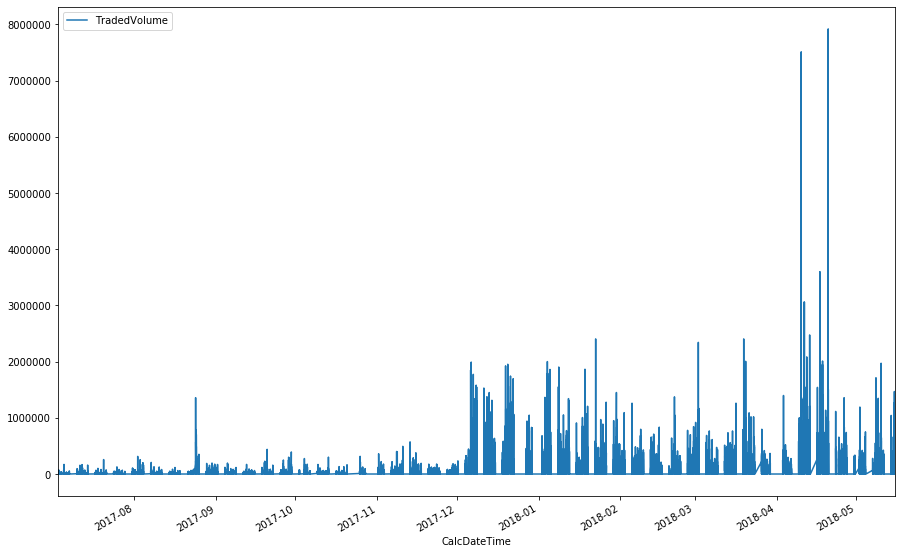

In [20]:
def basic_stock_features(input_df, mnemonic, new_time_index):
    stock = sorted_by_index.loc[mnemonic].copy()

    stock['HasTrade'] = 1.0
    
    stock = stock.reindex(new_time_index)
    
    features = ['MinPrice', 'MaxPrice', 'EndPrice', 'StartPrice']
    for f in features:
        stock[f] = stock[f].fillna(method='ffill')   
    
    features = ['HasTrade', 'TradedVolume', 'NumberOfTrades']
    for f in features:
        stock[f] = stock[f].fillna(0.0)
    
    stock['Mnemonic'] = mnemonic
    selected_features = ['Mnemonic', 'MinPrice', 'MaxPrice', 'StartPrice', 'EndPrice', 'HasTrade', 'TradedVolume', 'NumberOfTrades']
    return stock[selected_features]


snh = basic_stock_features(sorted_by_index, 'SNH', new_datetime_index)
snh[['TradedVolume']].plot()

In [21]:
snh.head()

,Mnemonic,MinPrice,MaxPrice,StartPrice,EndPrice,HasTrade,TradedVolume,NumberOfTrades
CalcDateTime,,,,,,,,
2017-07-03 08:00:00,SNH,4.450,4.456,4.456,4.450,1.0,5505.0,9.0
2017-07-03 08:01:00,SNH,4.450,4.456,4.456,4.450,0.0,0.0,0.0
2017-07-03 08:02:00,SNH,4.450,4.456,4.456,4.450,0.0,0.0,0.0
2017-07-03 08:03:00,SNH,4.457,4.457,4.457,4.457,1.0,899.0,2.0
2017-07-03 08:04:00,SNH,4.457,4.457,4.457,4.457,0.0,0.0,0.0


In [22]:
if enable_assert:
    tmp = basic_stock_features(sorted_by_index, 'BMW', new_datetime_index)
    tmp = tmp[tmp.index == np.datetime64('2018-01-02T09:01:00.000000000')]
    assert (tmp['EndPrice'].values[0] == 84.47)
    assert (tmp['TradedVolume'].values[0] == 4143)

In [23]:
stocks = []
for stock in top_k_stocks:
    stock = basic_stock_features(sorted_by_index, stock, new_datetime_index)
    stocks.append(stock)
# prepared should contain the numeric features for all top k stocks,
# for all days in the interval, for which there were trades (that means excluding weekends and holidays)
# for all minutes from 08:00 until 20:00
# in minutes without trades the prices from the last available minute are carried forward
# trades are filled with zero for such minutes
# a new column called HasTrade is introduced to denote the presence of trades
prepared = pd.concat(stocks, axis=0)

In [24]:
prepared['Mnemonic'].unique(), prepared['Mnemonic'].unique().shape[0]

(array(['SNH', 'DBK', 'EOAN', 'DTE', 'CBK', 'RWE', 'IFX', 'SVAB', 'LHA',
        'DAI', 'O2D', 'TKA', 'DPW', 'SIE', 'HDD', 'BAYN', 'AIXA', 'SAP',
        'BAS', 'EVT', 'AT1', 'PSM', 'BMW', 'VOW3', 'FRE', 'SDF', 'ALV',
        'CEC', 'GAZ', 'VNA', 'B4B', 'SHA', 'AB1', 'DLG', 'NDX1', 'UN01',
        'NOA3', 'IGY', 'ADS', 'VODI', '1COV', 'TUI1', 'BPE5', 'HEI', 'USE',
        'KCO', 'SZU', 'EVK', 'ADV', 'HEN3', 'MUV2', 'WDI', 'DWNI', 'MRK',
        'PAH3', 'DEZ', 'FME', 'FNTN', 'G1A', 'RKET', 'QIA', 'DB1', 'ZAL',
        'RIB', 'QSC', 'CON', 'SGL', 'BVB', 'SHL', 'PNE3', 'PBB', 'OSR',
        'TINA', 'BEI', 'TEG', 'AOX', 'UTDI', 'ARL', 'MDG1', 'SANT', 'LXS',
        'KGX', 'TTI', 'LINU', 'GYC', 'ARO', 'SOW', 'ANO', 'SZG', 'BOSS',
        'BNR', 'LLD', 'WAF', 'DRI', 'NDA', 'SY1', 'LIN', 'ZIL2', 'CAP',
        '3W9K'], dtype=object), 100)

In [25]:
prepared.head()

,Mnemonic,MinPrice,MaxPrice,StartPrice,EndPrice,HasTrade,TradedVolume,NumberOfTrades
CalcDateTime,,,,,,,,
2017-07-03 08:00:00,SNH,4.450,4.456,4.456,4.450,1.0,5505.0,9.0
2017-07-03 08:01:00,SNH,4.450,4.456,4.456,4.450,0.0,0.0,0.0
2017-07-03 08:02:00,SNH,4.450,4.456,4.456,4.450,0.0,0.0,0.0
2017-07-03 08:03:00,SNH,4.457,4.457,4.457,4.457,1.0,899.0,2.0
2017-07-03 08:04:00,SNH,4.457,4.457,4.457,4.457,0.0,0.0,0.0


In [26]:
if enable_assert:
    tmp = prepared[prepared.Mnemonic == 'BMW']
    tmp = tmp[tmp.index == np.datetime64('2018-01-02T09:01:00.000000000')]
    assert (tmp['EndPrice'].values[0] == 84.47)
    assert (tmp['TradedVolume'].values[0] == 4143)

In [27]:
# We save both in csv in pickle. Generally we'd read from the pickeled format because 
# it preserves the indices, but for cases where pkl cannot be read, we also output a csv format
! mkdir -p {output_folder}
prepared.to_csv(output_folder + '/cooked_v3.csv')

prepared.to_pickle(output_folder + '/cooked_v3.pkl')

## Future Work

- Prepare data by 5 min, 15 min, 30 min, 1 hour, 1 day
- Add extra (derived) features

In [28]:
! echo "Last run on $(date)"

Last run on Wed Jan 22 14:25:50 UTC 2020
